<a href="https://colab.research.google.com/github/garcialvarez/ml-estimation-of-obesity/blob/main/Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')

dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [2]:
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [5]:
dataset.shape

(2111, 17)

In [6]:
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

### Detección gráfica de valores atípicos
Se visualizan boxplots de las variables continuas más sensibles (`Age`, `Weight`, `FAF`, `TUE`) para identificar posibles observaciones atípicas que puedan requerir tratamiento previo al modelado.


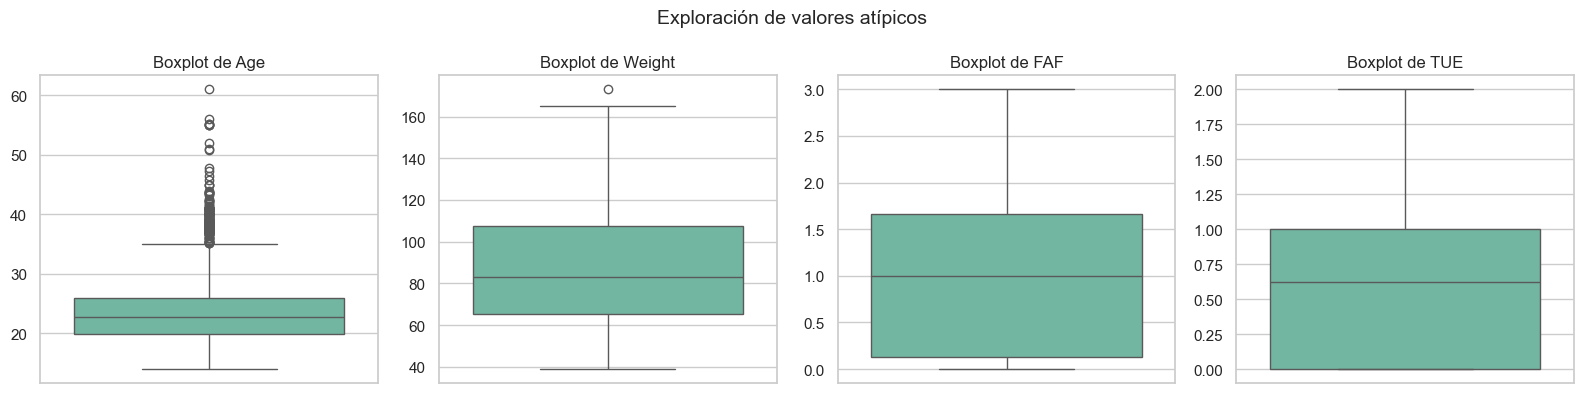

In [28]:
outlier_features = ['Age', 'Weight', 'FAF', 'TUE']
fig, axes = plt.subplots(1, len(outlier_features), figsize=(16, 4))

for ax, feature in zip(axes, outlier_features):
    sns.boxplot(y=dataset[feature], ax=ax, color='#66c2a5', orient='v')
    ax.set_title(f'Boxplot de {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.suptitle('Exploración de valores atípicos', fontsize=14)
plt.tight_layout()
plt.show()


In [7]:
dataset.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Exploración de las categorías**

In [8]:
dataset.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [9]:
dataset.value_counts('Gender') #ejemplo

Gender
Male      1068
Female    1043
Name: count, dtype: int64

In [10]:
dataset.value_counts('Age')

Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
21.310907      1
21.305402      1
21.291969      1
21.289104      1
61.000000      1
Name: count, Length: 1402, dtype: int64

In [11]:
dataset.value_counts('Height')

Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.664940     1
1.664927     1
1.664752     1
1.664622     1
1.980000     1
Name: count, Length: 1574, dtype: int64

In [12]:
dataset.value_counts('Weight')

Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
82.283185      1
82.276350      1
82.249831      1
82.228794      1
173.000000     1
Name: count, Length: 1525, dtype: int64

In [13]:
dataset.value_counts('family_history_with_overweight')

family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

In [14]:
dataset.value_counts('FAVC')

FAVC
yes    1866
no      245
Name: count, dtype: int64

In [15]:
dataset.value_counts('FCVC')

FCVC
3.000000    652
2.000000    600
1.000000     33
2.938031      2
2.204914      2
           ... 
2.123900      1
2.128574      1
2.129668      1
2.129969      1
2.340405      1
Name: count, Length: 810, dtype: int64

In [16]:
dataset.value_counts('NCP')

NCP
3.000000    1203
1.000000     199
4.000000      69
2.644692       2
1.737620       2
            ... 
2.116195       1
2.118153       1
2.119682       1
2.119826       1
2.646717       1
Name: count, Length: 635, dtype: int64

In [17]:
dataset.value_counts('CAEC')

CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

In [18]:
dataset.value_counts('SMOKE')

SMOKE
no     2067
yes      44
Name: count, dtype: int64

In [19]:
dataset.value_counts('CH2O')

CH2O
2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
           ... 
1.810310      1
1.809960      1
1.809531      1
1.808127      1
2.080968      1
Name: count, Length: 1268, dtype: int64

In [20]:
dataset.value_counts('SCC')

SCC
no     2015
yes      96
Name: count, dtype: int64

In [21]:
dataset.value_counts('FAF')

FAF
0.000000    411
1.000000    234
2.000000    183
3.000000     75
1.978631      2
           ... 
0.739881      1
0.736032      1
0.732276      1
0.732186      1
1.016042      1
Name: count, Length: 1190, dtype: int64

In [22]:
dataset.value_counts('TUE')

TUE
0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
           ... 
0.504816      1
0.505266      1
0.508663      1
0.508848      1
0.707780      1
Name: count, Length: 1129, dtype: int64

In [23]:
dataset.value_counts('CALC')

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

In [24]:
dataset.value_counts('MTRANS')

MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

In [25]:
dataset.value_counts('NObeyesdad')

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64